<a href="https://colab.research.google.com/github/mmehmadi94/STC-internship/blob/main/stc_TV_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STC Jawwy

In [ ]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

root_path = "gdrive/My Drive/'Colab Notebooks'/data"

Mounted at /content/drive


In [ ]:
dataframe = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data/stc TV Data Set_T2.xlsb',index_col=0)

# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [ ]:
# check the data shape
dataframe.shape

(86, 2)

In [ ]:
# display the first 5 rows 
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_                       86 non-null     datetime64[ns]
 1   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [ ]:
# display the dataset after applying data types
dataframe.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [ ]:
# describe the numeric values in the dataset
dataframe.describe()

,Total_watch_time_in_houres
count,86.000000
mean,780.817926
std,122.992002
min,562.124722
25%,707.709653
50%,763.181389
75%,840.985278
max,1123.551944


In [ ]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [ ]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [ ]:
# Display the dataframe after setting the date as index
dataframe.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


In [ ]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [ ]:
df = dataframe.copy()

## Performing the adfuller test on data
To check stationarity of our dataset.

> Where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.





In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.Total_watch_time_in_houres, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.7279558881675499
2. P-Value :  0.41676935469919685
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 82
5. Critical Values :
	 1% :  -3.512738056978279
	 5% :  -2.8974898650628984
	 10% :  -2.585948732897085


> P-value is high, then the time series is non-stationary.
 
> SARIMAX model is useful in the cases where the time series has seasonal pattern

## Build SARIMAX Model

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Total_watch_time_in_houres'],order=(0, 1, 1),seasonal_order=(0,1,1,12), 
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results=model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning:

The 'freq' argument in Timestamp is deprecated and will be removed in a future version.



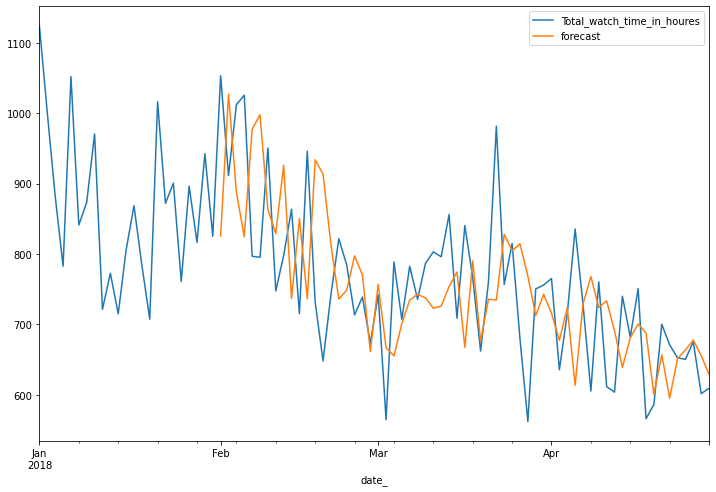

In [ ]:
df['forecast']=results.predict(pd.to_datetime('2018-02-01'),dynamic=False)
df[['Total_watch_time_in_houres','forecast']].plot(figsize=(12,8))

## Forecasting for Next Months


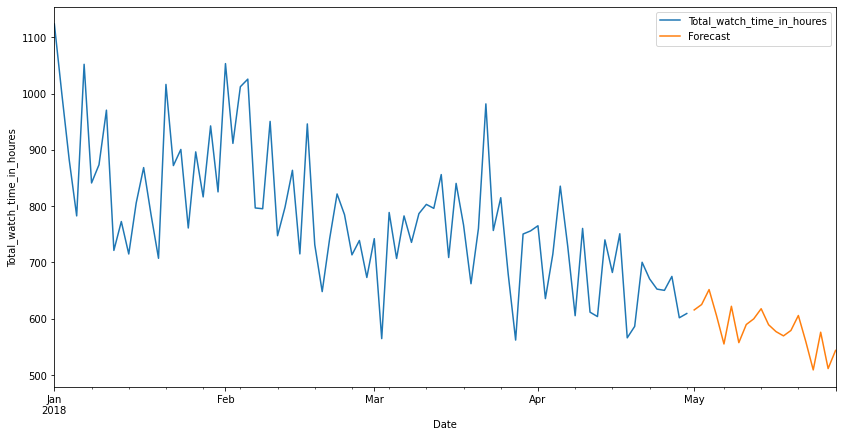

In [ ]:
# show forecasts 
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = df[['Total_watch_time_in_houres']].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Total_watch_time_in_houres')
plt.legend()
plt.show()

## Next Steps
*   Need more history data for users' watching time, 4 months is not enough to build an accurate model.




Resource:
[link text](https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/)